# Use case 4: Observatory events

In [1]:
import showermodel as sm
import numpy as np

This notebook describes how to construct an observatory made of several telescopes using the `Observatory` class (and subclasses) and how to use the `Event` class, which calculates the signal of all the telescopes of an observatory. These classes include advanced methods to show the geometry of an observatory that detects a shower.

### Construction of an observatory

`Observatory` is a subclass of `list` that only accepts objects of type `Telescope` as arguments. An optional parameter `obs_name` can also be input to give a name to the observatory. Some general characteristics of the observatory are stored as attributes.

In [2]:
telescope0 = sm.Telescope(x=0.1, y=0.2, theta=20., az=-40.)
telescope1 = telescope0.copy(x=0.2, y=0.1)
telescope2 = telescope0.copy(x=-0.3, y=-0.1)
observatory = sm.Observatory(telescope0, telescope1, telescope2, obs_name="My Observatory")

# Some attributes of Observatory objects
print("Observatory name:", observatory.obs_name)
print("Number of telescopes:", observatory.N_tel)
print("Type of telescopes:", observatory.tel_type)
print("Pointing direction:", [observatory.theta, observatory.az])

Observatory name: My Observatory
Number of telescopes: 3
Type of telescopes: generic
Pointing direction: [20.0, -40.0]


Once an `Observatory` object is constructed, more `Telescope` objects can be added using the `append` method. In the example below, the added telescope points to a different direction and thus the observatory pointing is no longer defined.

In [3]:
observatory.append(telescope1.copy(x=0., y=0., apert=5., theta=10., az=56.))
print("Observatory name:", observatory.obs_name)
print("Number of telescopes:", observatory.N_tel)
print("Type of telescopes:", observatory.tel_type)
print("Pointing direction:", [observatory.theta, observatory.az])

Observatory name: My Observatory
Number of telescopes: 4
Type of telescopes: generic
Pointing direction: [None, None]


The `show` method makes a 2D plot of telescope positions and indexes.

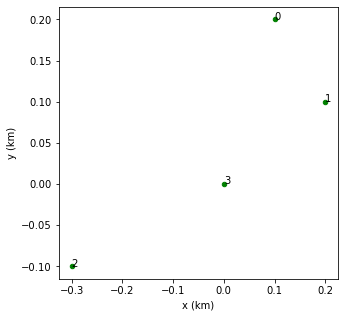

In [4]:
observatory.show();

Constituent `Telescope` objects can be accessed via an index (starting at 0). This allows you to both get and set telescope attributes.

In [5]:
print("# Before changes")
print("Pointing of last added telescope:", [observatory[-1].theta, observatory[-1].az])
print("Observatory pointing direction:", [observatory.theta, observatory.az])

# Now, the pointing of the last-added telescope is set to be the same as the other ones
observatory[-1].theta = observatory[0].theta
observatory[-1].az = observatory[0].az
print("# After changes")
print("Pointing of last added telescope:", [observatory[-1].theta, observatory[-1].az])
print("Observatory pointing direction:", [observatory.theta, observatory.az])

# Before changes
Pointing of last added telescope: [10.0, 56.0]
Observatory pointing direction: [None, None]
# After changes
Pointing of last added telescope: [20.0, -40.0]
Observatory pointing direction: [20.0, -40.0]


Instead of changing the pointing directions of the individual telescopes, the method `set_pointing` allows you to set the pointings of all the telescopes of the observatory at a time.

In [6]:
observatory.set_pointing(theta=30., az=15.)
print("Pointing of first telescope:", [observatory[0].theta, observatory[0].az])
print("Observatory pointing direction:", [observatory.theta, observatory.az])

Pointing of first telescope: [30.0, 15.0]
Observatory pointing direction: [30.0, 15.0]


Help on `Observatory`.

In [7]:
# sm.Observatory?

### Predefined observatories: `Array25`

`Array25` is a subclass of `Observatory` that generates an observatory consisting of 25 telescopes in a circular layout. The input parameters and their default values are:

- `obs_name` : Name given to the observatory. Default 'Array25'.
- `telescope` : `Telescope` object to be used to construct the observatory. If None, a telescope of type `tel_type` is used. Default None.
- `tel_type` : Type of telescope to be used when `telescope==None`. Default 'IACT'.
- `x_c`, `y_c`, `z_c` : East, north and height (from ground) coordinates in km of the center of the array. Default (0, 0, 0).
- `R` : Radius in km of the array. Default 341.
- `rot_angle` : Rotation angle in degrees of the array (clockwise from north). Default 0.
- `theta`, [`alt`], `az` : Zenith, altitude and azimuth angles in degrees of the observatory pointing direction. Either `theta` or `alt` can be specified, but if `alt` is given, `theta` is overwritten. Default (0, None, 0).

Observatory name: Array25
Number of telescopes: 25
Type of telescopes: IACT
Center of the array: [0.2, 0.2, 0.5]
Pointing direction: [20.0, 120.0]


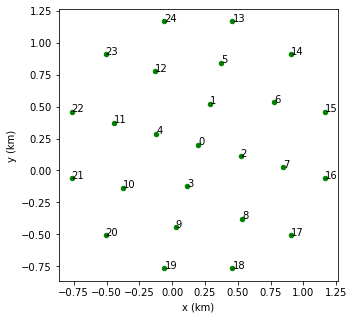

In [8]:
# Default Array25 object
# observatory = sm.Array25()

# Setting the center position, including height, radius, pointing direction and rotation angle (see plot below)
observatory = sm.Array25(x_c=0.2, y_c=0.2, z_c=0.5, R=1., theta=20., az= 120., rot_angle=15.)

print("Observatory name:", observatory.obs_name)
print("Number of telescopes:", observatory.N_tel)
print("Type of telescopes:", observatory.tel_type)
print("Center of the array:", [observatory.x_c, observatory.y_c, observatory.z_c])
print("Pointing direction:", [observatory.theta, observatory.az])

observatory.show();

The default telescope type is 'IACT', but the observatory can be constructed using a different predefined telescope or a customized telescope via the parameters `tel_type` and `telescope`, respectively.

In [9]:
#telescope = sm.Telescope(theta=30., az= 10., apert=15., area=50.) # Instead of the default IACT telescope
#observatory = sm.Array25(telescope=telescope, R=1., theta=20., az= 120.)  # theta and az are overwritten

Help on `Array25`.

In [10]:
# sm.Array25?

### Predefined observatories: `Grid`

`Grid` is another subclass of `Observatory` that genereates a rectangular grid of telescopes. The input parameters and their default values are:

- `obs_name` : Name given to the observatory. Default 'Grid'.
- `telescope` : `Telescope` object to be used to construct the observatory. If None, a telescope of type `tel_type` is used. Default None.
- `tel_type` : Type of telescope to be used when `telescope==None`. Default 'GridElement'.
- `x_c`, `y_c`, `z_c` : East, north and height (from ground) coordinates in km of the center of the array. Default (0, 0, 0).
- `size_x`, `size_y` : Size of the grid in km along the x and y directions. Default (2., 2.).
- `N_x`, `N_y` : Number of cells across the x and y directions. Default (10, 10).
- `theta`, [`alt`], `az` : Zenith, altitude and azimuth angles in degrees of the observatory pointing direction. Either `theta` or `alt` can be specified, but if `alt` is given, `theta` is overwritten. Default (0, None, 0).

In this case, the default telescope type is `GridElement`, which has an aperture of 180 degrees around zenith direction and a 100 % detection efficiency in the 290 - 430 nm wavelength interval.

Observatory name: Grid
Number of telescopes: 100
Type of telescopes: GridElement
Center of the array: [0.0, 0.0, 0.0]
Cell area in m^2: 40000.0


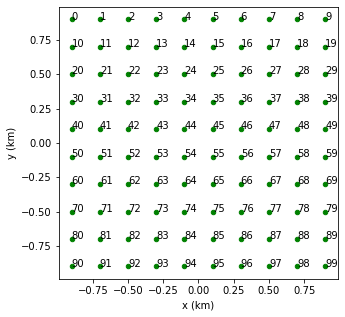

In [11]:
# Default Grid object
observatory = sm.Grid()

# Some attributes of Grid
print("Observatory name:", observatory.obs_name)
print("Number of telescopes:", observatory.N_tel)
print("Type of telescopes:", observatory.tel_type)
print("Center of the array:", [observatory.x_c, observatory.y_c, observatory.z_c])
print("Cell area in m^2:", np.around(observatory.cell_area))

observatory.show();

A `Grid` object is generated when using the `show_distribution` method of `Shower` (see UC3). In fact, an existing `Grid` object can be passed to `show_distribution`.

In [12]:
#shower = sm.Shower(theta=20., az=30.)
#grid = sm.Grid(tel_type='IACT', theta=19., az=31., size_x=4., size_y=4., N_x=10, N_y=10)
#shower.show_distribution(grid=grid);

# Equivalent procedure
#shower.show_distribution(tel_type='IACT', theta=20., az=31., size_x=4., size_y=4., N_x=10, N_y=10);

Help on `Grid`.

In [13]:
# sm.Grid?

### Observatory events

`Event` calculates the signals of all the telescopes of an observatory that detects a shower. Therefore, an `Event` object is constructed from a `Shower` object and an `Observatory` object. In addition, this class has the same optional parameters as `Signal` (see UC3):

- `atm_trans` : Include the atmospheric transmision. Default True.
- `tel_eff` : Include the telescope efficiency. If False, 100% efficiency is assumed within the wavelength interval given by `wvl_ini`, `wvl_fin` and `wvl_step`. Default True.
- `wvl_ini`, `wvl_fin`, `wvl_step` : Wavelength interval and discretization step in nm to calculate the signal when `tel_eff=False`. Default [290, 430] interval with 3 nm step.

In [14]:
shower = sm.Shower(x0=0.2, y0=0.1, theta=20., az=45.)
observatory = sm.Array25(R=1., theta=22., az= 45.)
# Including both atmospheric transmission and telescope efficiency by default
event1 = sm.Event(observatory, shower)
# Both atmospheric transmission and telescope efficiency are turned off
# The default wavelength interval is kept
event2 = sm.Event(observatory, shower, atm_trans=False, tel_eff=False)

# Equivalent method of Shower
#event1 = shower.Event(observatory)
#event2 = shower.Event(observatory, atm_trans=False, tel_eff=False)

`Event` contains the constituent `Shower` and `Observatory` objects as well as two lists named `projections` and `signals`, containing respectively the `Projection` and `Signal` objects corresponding to each telescope. This way, you may access the properties of telescopes and signals by an index.

Like in `Signal`, the `Atmosphere`, `Track`, `Profile`, `Cherenkov` and `Fluorescence` objects associated to `Shower` can be accessed as attributes of `Event`.

In [15]:
signals1 = event1.signals
signals2 = event2.signals
projections = event1.projections # Equivalent to projections = event2.projections

print("Position of sixth telescope:", np.around([observatory[5].x, observatory[5].y, observatory[5].z], 3))
print("Total number of photoelectrons in sixth telescope:", np.around(signals1[5].Npe_total_sum))
print("The same but without atmospheric transmission or detection efficiency:", np.around(signals2[5].Npe_total_sum))

projections[5]

# Accessing the track and the profile
#event1.track  # Equivalent to event1.shower.track
#event1.profile.show();

Position of sixth telescope: [0.    0.667 0.   ]
Total number of photoelectrons in sixth telescope: 59.0
The same but without atmospheric transmission or detection efficiency: 209.0


,distance,alt,az,theta,phi,beta,time,FoV
0,0.594699,9.931877,157.263955,88.847341,198.586391,88.026633,1.910484,False
1,0.640521,28.712512,150.198384,68.942729,197.920523,68.111420,1.335127,False
2,0.749791,43.157349,142.628357,53.278761,197.261767,52.436963,0.971408,False
3,0.899679,52.945869,134.782324,42.199367,196.610181,41.347193,0.743180,False
4,1.073302,59.327879,126.944395,34.487429,195.965814,33.624993,0.594121,False
...,...,...,...,...,...,...,...,...
545,119.000741,70.115662,45.767436,2.133327,139.865614,0.286164,0.000041,True
546,119.219048,70.115453,45.766023,2.133055,139.853575,0.285640,0.000031,True
547,119.437355,70.115245,45.764615,2.132785,139.841577,0.285117,0.000022,True
548,119.655662,70.115038,45.763212,2.132515,139.829620,0.284597,0.000013,True


Help on `Event`.

In [16]:
# sm.Event?

### Special methods of `Event`

In the first place, `Event` has the method `show_projection` that is equivalent to that of `Shower` (see UC2), with the difference that it uses one of the telescopes of the observatory from which the `Event` object was generated. The telescope has to be specified by the parameter `tel_index` (default 0). Like in `Shower`, the red circles represent the shower points, the radii being proportional to the energy deposited in each step length (this default option can be deactivated setting `shower_Edep=False`). The blue mark is at the position of the depth of maximum by default, but a different slant depth can be input via the parameter `X_mark`.

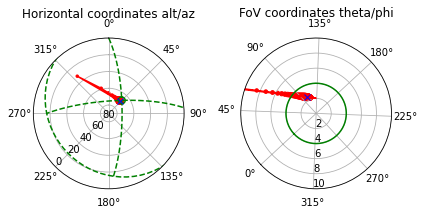

In [17]:
shower = sm.Shower(x0=0.2, y0=0.1, theta=20., az=45.)
observatory = sm.Array25(R=1., theta=22., az= 45.)
event = sm.Event(observatory, shower)

event.show_projection(tel_index=2, max_theta=10.);

Help on `show_projection` method.

In [18]:
# event.show_projection?

`Event` has also the `show_distribution` method equivalent to that of `Shower` (see UC3), but it uses one of the telescopes of `Event` to generate the `Grid` object for which the distribution is calculated. Again, the telescope is selected via the parameter `tel_index` (default 0). The grid is centered at the position of such telescope and has the same pointing direction. In addition, the default values of `atm_trans` and `tel_eff` are those of the `Event` object, although they can be modified. In case of `tel_eff=False`, the wavelength interval can be selected via the paramters `wvl_ini`, `wvl_fin` and `wvl_step`.

Position of telescope 9: [ 0.    -0.667  0.   ]


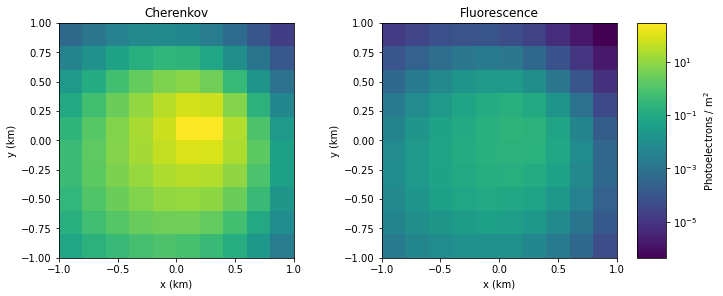

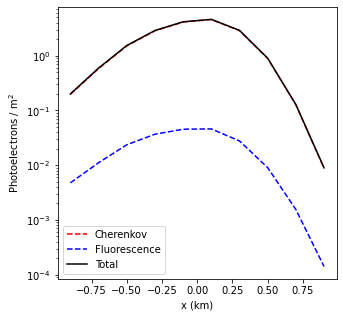

In [19]:
shower = sm.Shower(x0=0.2, y0=0.1, theta=20., az=45.)
observatory = sm.Array25(R=1., theta=22., az=45.) # Centered at (0, 0, 0)
event = sm.Event(observatory, shower) # Both atmospheric transmission and telescope efficiency included

# 2D distribution centered at (0, 0 ,0). The pointing direction is theta=22, az=4
# The aperture and efficiency are those of a telescope of type IACT
event.show_distribution(size_x=2., size_y=2., N_x=10, N_y=10);

# 1D distribution along the x direction centered at the position of telescope 9
event.show_distribution(tel_index=9, size_x=2., size_y=0.2, N_x=10, N_y=1);
tel = event.observatory[9]
print("Position of telescope 9:", np.around([tel.x, tel.y, tel.z], 3))

There also two new methods named `show_geometry2D` and `show_geometry3D` that allow you to visualize the geometry of an observatory event in a 2D plot and a 3D plot, respectively. By default, a square area of 1x1 km$^2$ centered at the origin of coordinates is shown, but this can be changed via the optional parameters `x_min`, `x_max`, `y_min` and `y_max`. Like in `show_projection`, the shower points are represented by red circles of size proportional to the energy deposit by default (parameter `shower_Edep`). The telescope positions are represented by green circles of size proportional to the signal by default (parameter `signal_size`). In addition, in the 3D plot, the vertical projection of the shower track on ground is represented by a dashed red line (parameter `xy_proj`).

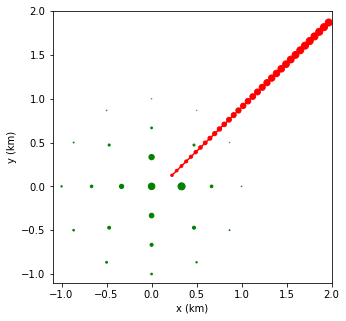

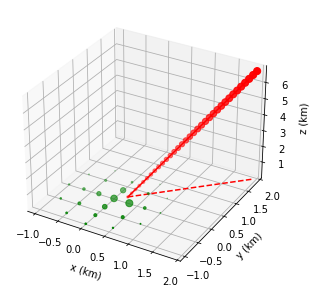

In [20]:
# Setting visualization area at ground level
event.show_geometry2D(x_min=-1.1, x_max=2., y_min=-1.1, y_max=2.);
event.show_geometry3D(x_min=-1.1, x_max=2., y_min=-1.1, y_max=2.);

More options of `show_geometry2D` and `show_geometry3D` are described in the help.

In [21]:
#event.show_geometry2D?
#event.show_geometry3D?